In [1]:
import numpy as np
import timeit
import statistics
import random
import matplotlib.pyplot as plt

def objective(w,n,y,x,lmbda):
    sum_loss = 0
    for i in range(n):
        l = 1-y[i,]*(w.T.dot(x[i,:]))
        l = max(0, l)
        sum_loss+=l
    obj = (lmbda/2)*w.T.dot(w)
    obj+=sum_loss/n
    return obj.item()

def fly_pegasos(k,d,n,y,x,lmbda):
    w = np.zeros((d,1))
    k_max = 0
    t = 1
    iter_count = []
    objectives = []
    while True:
        A_t = random.sample(range(n),k)
        summation = 0
        ita = (1)/(lmbda*t)
        summation=np.zeros((d,1))
        for i in A_t:
            if(y[i]*w.T.dot(x[i])<1):
                k_max+=1
                summation+=y[i]*(x[i][:,None])
                
                if(k_max>100*n):
                    print(objective(w,n,y,x,lmbda))
                    print(t)
                    return iter_count,objectives
        w_t_half = (1-ita*lmbda)*w + (ita/k)*summation
        minimum = min(1, 1./(np.sqrt(lmbda)*np.linalg.norm(w_t_half)))
        w = minimum*w_t_half
        t = t+1
        iter_count.append(t)
        objectives.append(objective(w,n,y,x,lmbda))
        if(t>1000):
            print(objective(w,n,y,x,lmbda))
            print(t)
            return iter_count,objectives


def myPegasos(filename,k,numruns):
    mnist_data = np.loadtxt(filename,delimiter=',')
    n = mnist_data.shape[0]
    x = mnist_data[:,1:]
    d = x.shape[1]
    y = mnist_data[:,:1].reshape((n,1))
    y[y==1] = 1
    y[y==3] = -1
    lmbda = 10
    time_list = [0 for i in range(numruns)]
    colours=['r','g','b','c','m','y','k','w']
    for i in range(numruns):
        start = timeit.default_timer()
        iter_count,objective = fly_pegasos(k,d,n,y,x,lmbda)
        plt.plot(iter_count, objective, colours[i])
        stop = timeit.default_timer()
        time_list[i] = stop-start
    print(time_list)
    print(statistics.stdev(time_list))
    plt.xlabel('iter')
    plt.ylabel('obj')
    plt.title('pegasos200')
    plt.show()


0.008967261133050438
1001
0.009463624581430647
1001
0.009235716561290908
1001
0.008790269666771593
1001
0.008396103354735437
1001
[10.115789275000001, 10.125499389000002, 10.123253542999997, 10.239074613, 10.252640244999995]
0.06836888987091994


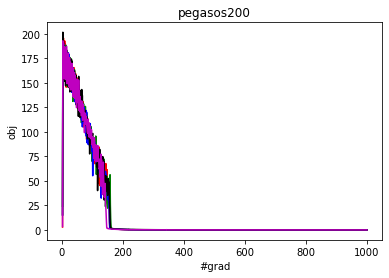

In [2]:
myPegasos('/Users/shivambhandari/Desktop/csci5525/hw2/MNIST-13.csv',k=200,numruns=5)